In [9]:
from gensim.models import KeyedVectors
import json

# Word2Vecモデルのロード
model = KeyedVectors.load_word2vec_format('model_neo_nouns_only.bin', binary=True)

with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)
# print(word_pairs)
# print(type(word_pairs))

In [56]:
# コサイン類似度のリストを生成
cosine_similarities = []
not_exist_word_lst = []
vector_diff = []
for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        similarity = model.similarity(word1, word2)
        vector_diff.append(model[word1] - model[word2])
        cosine_similarities.append((word1, word2, similarity))
        # cosine_similarities.append(similarity)
    else:
        not_exist_word_lst.append((word1, word2))  # 単語がモデルにない場合
cosine_similarities


[('冬休み', '春休み', 0.7252937),
 ('副業', 'アルバイト', 0.45181403),
 ('twitter', 'Line', 0.1550823),
 ('水族館', '動物園', 0.6625593),
 ('ファミレス', 'カフェ', 0.39398125),
 ('ガラケー', '固定電話', 0.42261103),
 ('太陽', '月', 0.5142987),
 ('マフラー', '手袋', 0.4699858),
 ('エレベーター', 'エスカレーター', 0.81077504),
 ('コンビニ', 'スーパー', 0.51697165),
 ('海', 'プール', 0.2731715),
 ('年末', '年始', 0.61827815),
 ('コンタクトレンズ', 'メガネ', 0.57304037),
 ('セロテープ', 'ガムテープ', 0.6011242),
 ('東京タワー', 'スカイツリー', 0.58810306),
 ('コップ', 'グラス', 0.5303551),
 ('カブトムシ', 'クワガタ', 0.6492276),
 ('飛行機', '新幹線', 0.3106094),
 ('カレー', 'シチュー', 0.57059044),
 ('はさみ', 'カッター', 0.33038047),
 ('テニス', '卓球', 0.69981354),
 ('スケート', 'スキー', 0.56949526),
 ('りす', 'ハムスター', 0.23761433),
 ('ぞう', 'きりん', 0.32804543),
 ('タクシー', 'バス', 0.70716774),
 ('セミ', '鈴虫', 0.13741742),
 ('扇風機', 'クーラー', 0.5548504),
 ('ディズニーランド', 'USJ', 0.44813237),
 ('ブランコ', 'シーソー', 0.44107133),
 ('サッカー', 'ラグビー', 0.73943615),
 ('炎', '赤', 0.3418328),
 ('時間', 'お金', 0.32312855),
 ('痴漢', '鬼ごっこ', 0.24330692),
 ('赤ちゃん', 'ハムスター', 0.5

In [57]:
import numpy as np
import matplotlib.pyplot as plt
m = np.array(vector_diff)

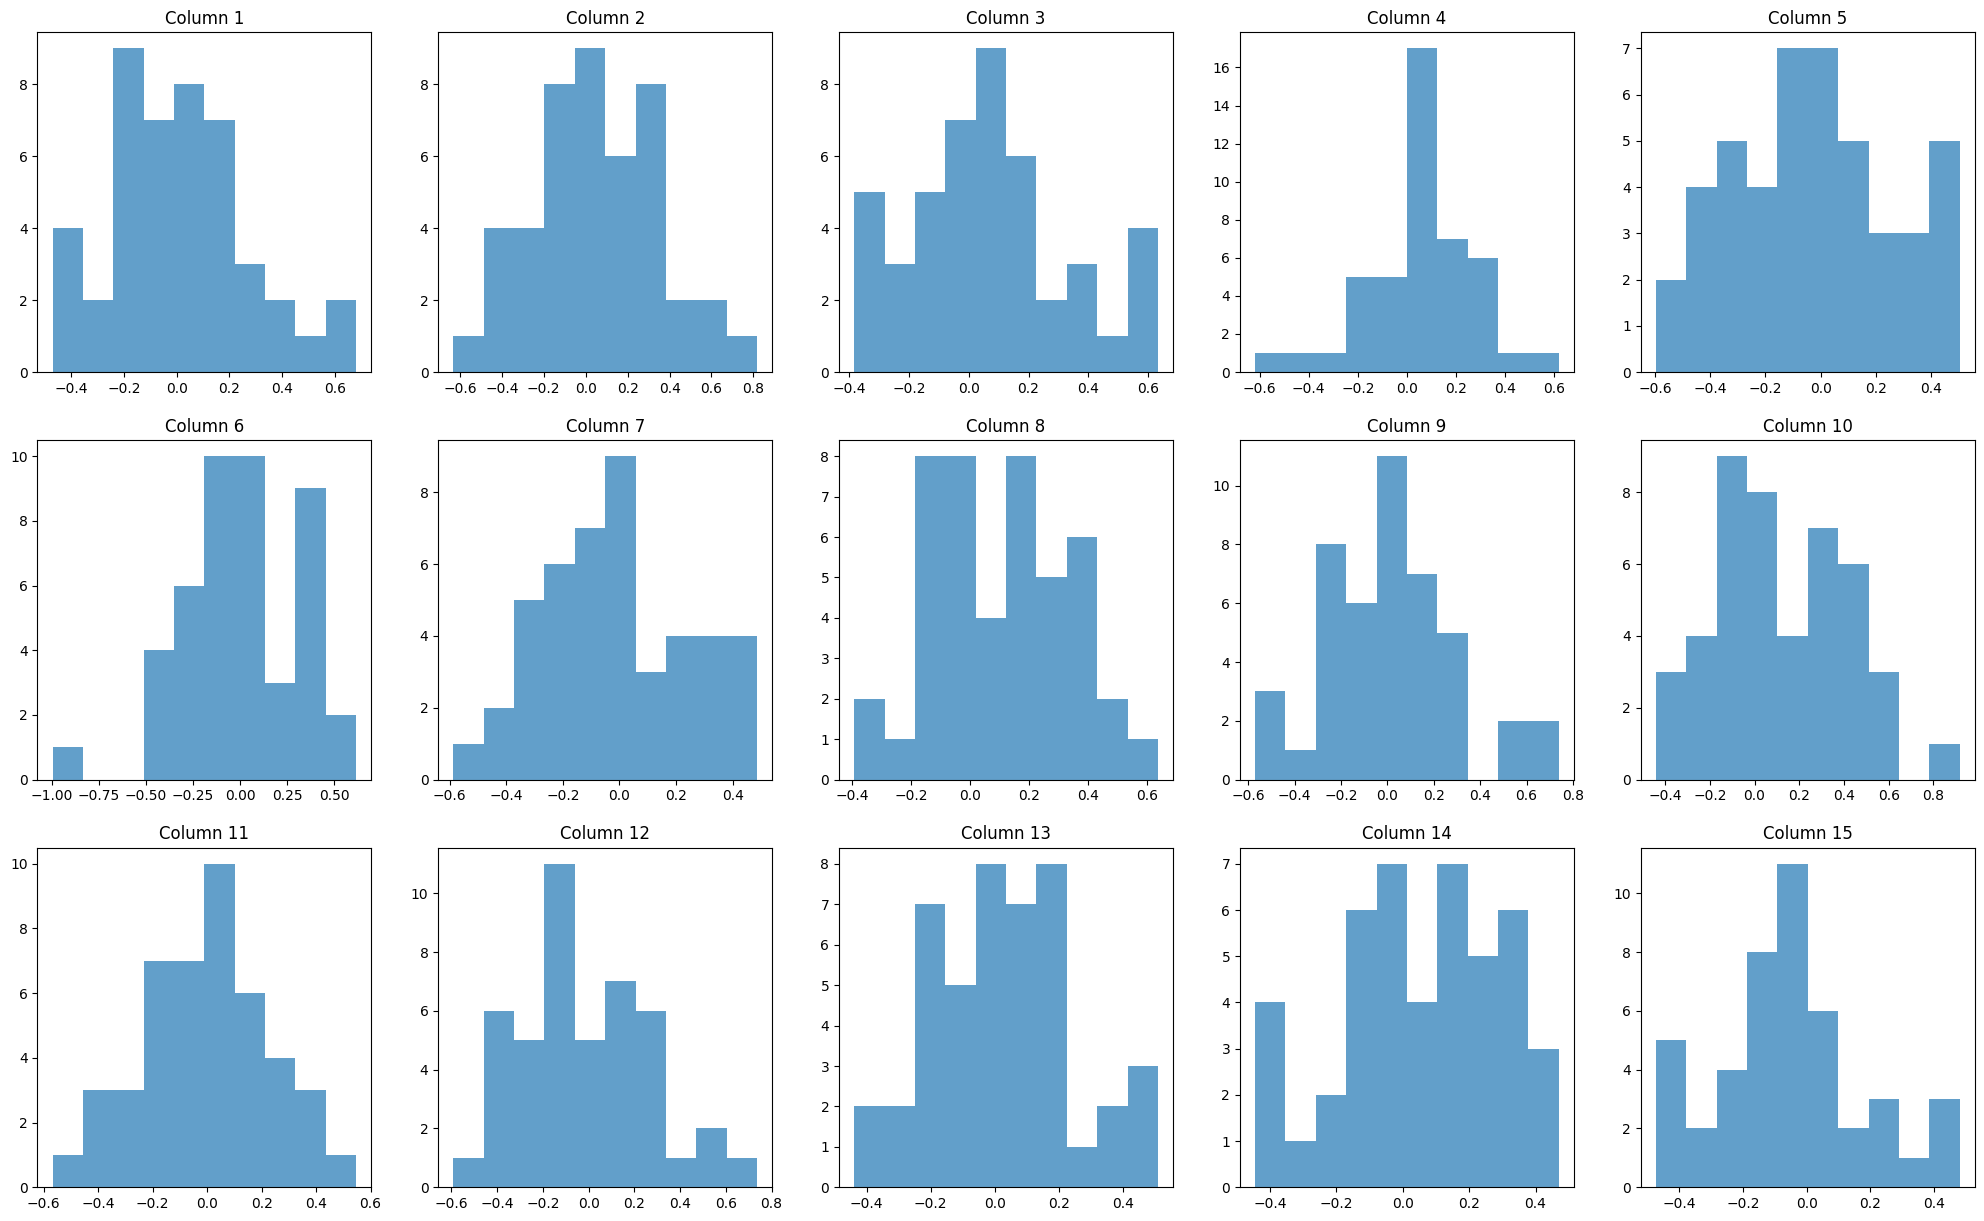

In [58]:
columns_to_plot = 15
plt.figure(figsize=(25,15))
for i in range(columns_to_plot):
    # plt.subplot(1, columns_to_plot, i + 1)
    plt.subplot(3,5,i+1)
    plt.hist(m[:, i], bins=10, alpha=0.7)
    plt.title(f'Column {i+1}')

In [59]:
mean = np.mean(vector_diff, axis=0)

In [60]:
mean

array([-2.67384457e-03,  4.26083952e-02,  5.78565337e-02,  5.05044833e-02,
       -3.59242558e-02,  1.31693287e-02, -1.50504801e-02,  1.06343664e-01,
        2.00033989e-02,  1.18923359e-01, -3.08377785e-03, -9.15359892e-03,
        2.04365924e-02,  5.39791472e-02, -5.37946485e-02,  3.04290764e-02,
        1.72152929e-02, -3.88436485e-03,  1.78745873e-02, -5.07342964e-02,
       -3.54802236e-03,  5.85428718e-03, -4.05826345e-02, -3.69344987e-02,
        1.19178044e-02,  7.59880170e-02, -5.35806641e-02,  4.35991958e-02,
        4.81225476e-02,  2.94774398e-02,  2.76439581e-02, -2.62167081e-02,
       -6.72396496e-02, -3.76331136e-02,  1.62106697e-02,  4.70425412e-02,
        7.10789338e-02, -2.90780365e-02, -1.62176602e-02,  4.65200618e-02,
       -4.00425680e-02, -5.25973551e-03, -2.54344270e-02, -2.52084415e-02,
        4.58165929e-02,  3.38754244e-02,  5.52017316e-02,  2.62008384e-02,
       -6.58518970e-02,  2.88682175e-03,  1.17008211e-02,  1.59465875e-02,
       -8.87935690e-04, -

In [497]:
import random
# モデルの語彙からランダムに単語を選択
random_word = random.choice(list(model.index_to_key))

# print(random_word)
# 選択した単語のベクトルを取得
random_word_vec = model[random_word]
similar_word_vec = random_word_vec + random_word_vec

similar_words = model.similar_by_vector(similar_word_vec, topn=10)
closest_word = similar_words

print(f"元の単語: {random_word}")
print(f"最も近い単語: {closest_word}")

元の単語: 離心率
最も近い単語: [('離心率', 1.0000001192092896), ('軌道離心率', 0.8328292965888977), ('公転周期', 0.8121095895767212), ('軌道長半径', 0.7918839454650879), ('軌道傾斜角', 0.7610890865325928), ('公転', 0.7604000568389893), ('赤道傾斜角', 0.7359160780906677), ('天文単位', 0.7333819270133972), ('自転周期', 0.7299045920372009), ('楕円軌道', 0.7253599166870117)]


ipadic辞書を使う。  
neologdも使いたいが、使用頻度が高いものを使えればいいがわからい